In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from mpl_toolkits.mplot3d import axes3d

In [0]:
parkinson_data_url = "https://raw.githubusercontent.com/ducongo/mlcoursedataset/master/parkinsons.data?token=AGNTW7WKJAHJD63C3JNGCT26IMGZK"

In [0]:
parkinson_data = pd.read_csv(parkinson_data_url)
parkinson_data = pd.read_csv(parkinson_data_url)

#moving status column to the last column index
df1 = parkinson_data.pop('status')
parkinson_data['status'] = df1

In [0]:
'''
NOTE: There will be 3 instances where you have to choose a file to be uploaded.
      In order, they are:
        1. logisticregression.py
        2. kfold.py
        3. lda.py
      Make sure these files are stored somewhere on your computer.
      If you take too long to click "Choose File", just re-run the code (Ctrl+F9) and try again.
      If you get any weird errors before choosing a file, just re-run the code (Ctrl+F9) and try again.
'''
from google.colab import files
src_logistic_reg = list(files.upload().values())[0] # Choose File: logisticregression.py
src_kfold = list(files.upload().values())[0] # Choose File: kfold.py
src_lda2 = list(files.upload().values())[0] # Choose File: lda.py

##Parkinson data exploration

In [0]:
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [0]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null fl

In [0]:
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


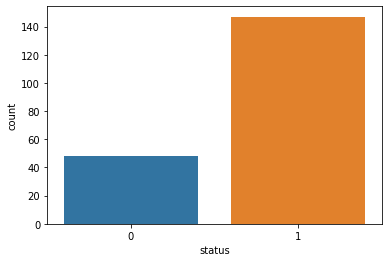

In [0]:
sns.countplot(x="status", data=parkinson_data)

The fact that there's more sample with a status of 1 thn a status of 0 will surely make our model on this dataset bias

In [0]:
parkinson_data.isnull()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

## Finding the best features to use from this dataset
There's too man features we don't perhaps need. We are going to see which one are correlated and perform PCS i order to find the best features that will determine the output of our inputs

Text(0, 0.5, 'MDVP:Flo(Hz)')

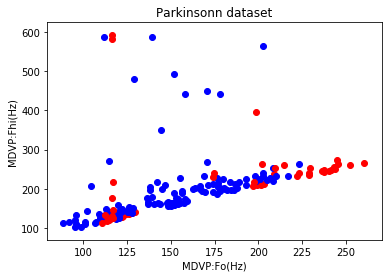

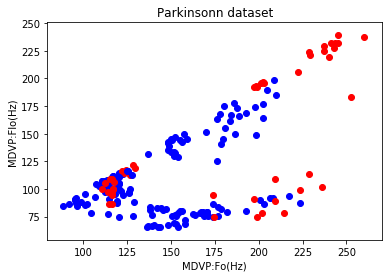

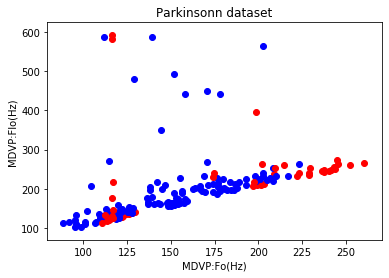

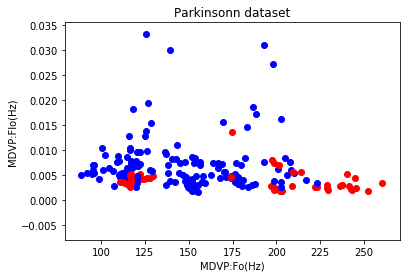

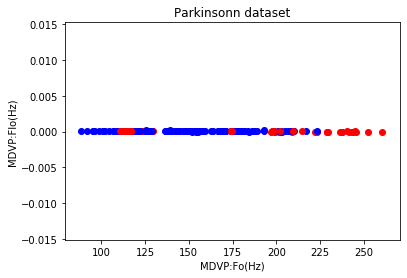

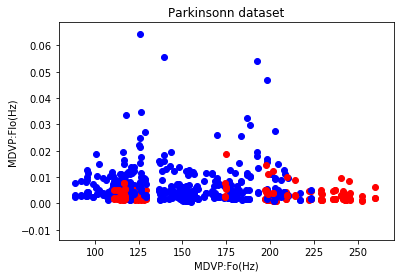

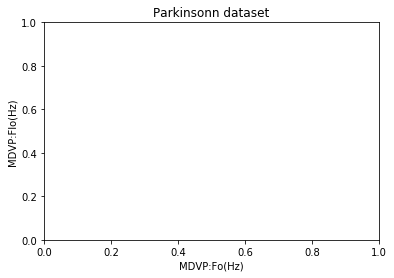

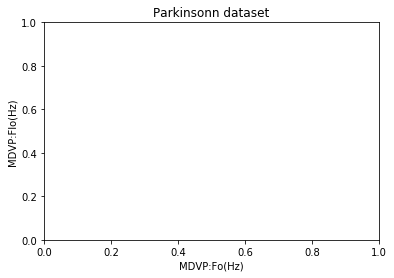

In [0]:
colors = {0:'r', 1:'b'}
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()
fig7, ax7 = plt.subplots()
fig8, ax8 = plt.subplots()

data = parkinson_data
# plot each data-point
for i in range(len(data['MDVP:Fo(Hz)'])):
    ax.scatter(data['MDVP:Fo(Hz)'][i], data['MDVP:Fhi(Hz)'][i],color=colors[data['status'][i]])
    ax2.scatter(data['MDVP:Fo(Hz)'][i], data['MDVP:Flo(Hz)'][i],color=colors[data['status'][i]])
    ax3.scatter(data['MDVP:Fo(Hz)'][i], data['MDVP:Fhi(Hz)'][i],color=colors[data['status'][i]])
    ax4.scatter(data['MDVP:Fo(Hz)'][i], data['MDVP:Jitter(%)'][i],color=colors[data['status'][i]])
    ax5.scatter(data['MDVP:Fo(Hz)'][i], data['MDVP:Jitter(Abs)'][i],color=colors[data['status'][i]])
    ax6.scatter(data['MDVP:Fo(Hz)'][i], data['MDVP:RAP'][i],color=colors[data['status'][i]])
    ax6.scatter(data['MDVP:Fo(Hz)'][i], data['MDVP:PPQ'][i],color=colors[data['status'][i]])
    ax6.scatter(data['MDVP:Fo(Hz)'][i], data['Jitter:DDP'][i],color=colors[data['status'][i]])
# set a title and labels
ax.set_title('Parkinsonn dataset')
ax.set_xlabel('MDVP:Fo(Hz)')
ax.set_ylabel('MDVP:Fhi(Hz)')

ax2.set_title('Parkinsonn dataset')
ax2.set_xlabel('MDVP:Fo(Hz)')
ax2.set_ylabel('MDVP:Flo(Hz)')

ax3.set_title('Parkinsonn dataset')
ax3.set_xlabel('MDVP:Fo(Hz)')
ax3.set_ylabel('MDVP:Flo(Hz)')

ax4.set_title('Parkinsonn dataset')
ax4.set_xlabel('MDVP:Fo(Hz)')
ax4.set_ylabel('MDVP:Flo(Hz)')

ax5.set_title('Parkinsonn dataset')
ax5.set_xlabel('MDVP:Fo(Hz)')
ax5.set_ylabel('MDVP:Flo(Hz)')

ax6.set_title('Parkinsonn dataset')
ax6.set_xlabel('MDVP:Fo(Hz)')
ax6.set_ylabel('MDVP:Flo(Hz)')

ax7.set_title('Parkinsonn dataset')
ax7.set_xlabel('MDVP:Fo(Hz)')
ax7.set_ylabel('MDVP:Flo(Hz)')

ax8.set_title('Parkinsonn dataset')
ax8.set_xlabel('MDVP:Fo(Hz)')
ax8.set_ylabel('MDVP:Flo(Hz)')

## Using correlation to determine which features to keep

In [0]:
corr = parkinson_data.corr()

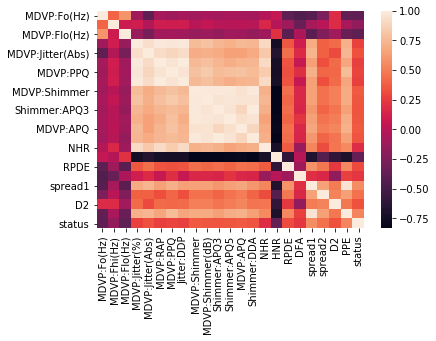

In [0]:
sns.heatmap(corr)

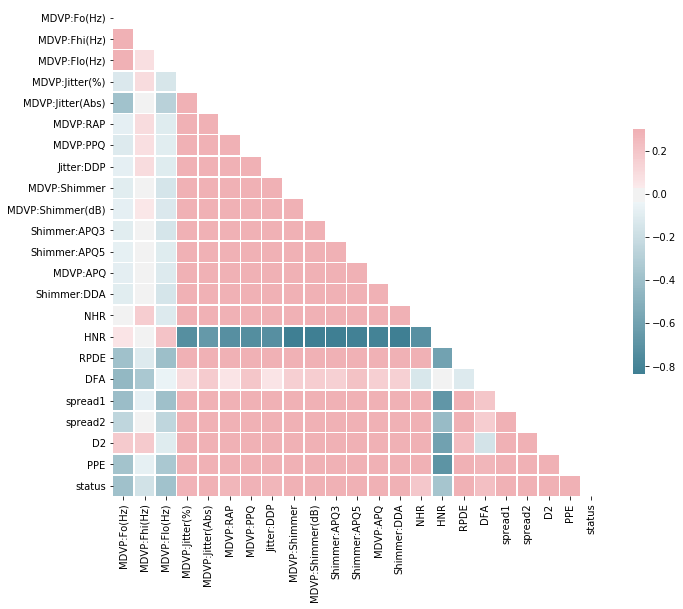

In [0]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# a better visual representation of the correlation found within the dataset
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f0, ax0 = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
#removing column 1
data = parkinson_data.drop(columns="name")
selected_columns = data.columns[columns]
data = data[selected_columns]

In [0]:
selected_columns = selected_columns[: len(selected_columns) - 1].values

In [0]:
corr.shape

(23, 23)

In [0]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        # regressor_OLS = sm.OLS(Y, x).fit()
        regressor_OLS = sm.OLS(endog=Y, exog=x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,:len(data.columns) - 1].values, data.iloc[:,len(data.columns) - 1].values, SL, selected_columns)

In [0]:
result = pd.DataFrame()
result['status'] = data.iloc[:,len(data.columns) - 1]

In [0]:
result.head()

,status
0,1
1,1
2,1
3,1
4,1


In [0]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [0]:
corr = data.corr()

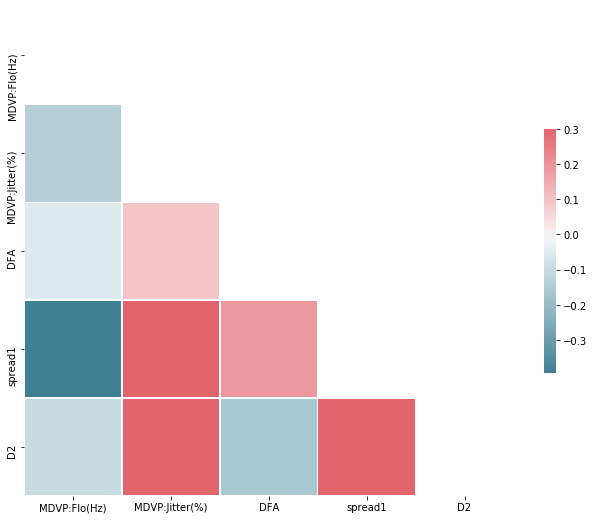

In [0]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f0, ax0 = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

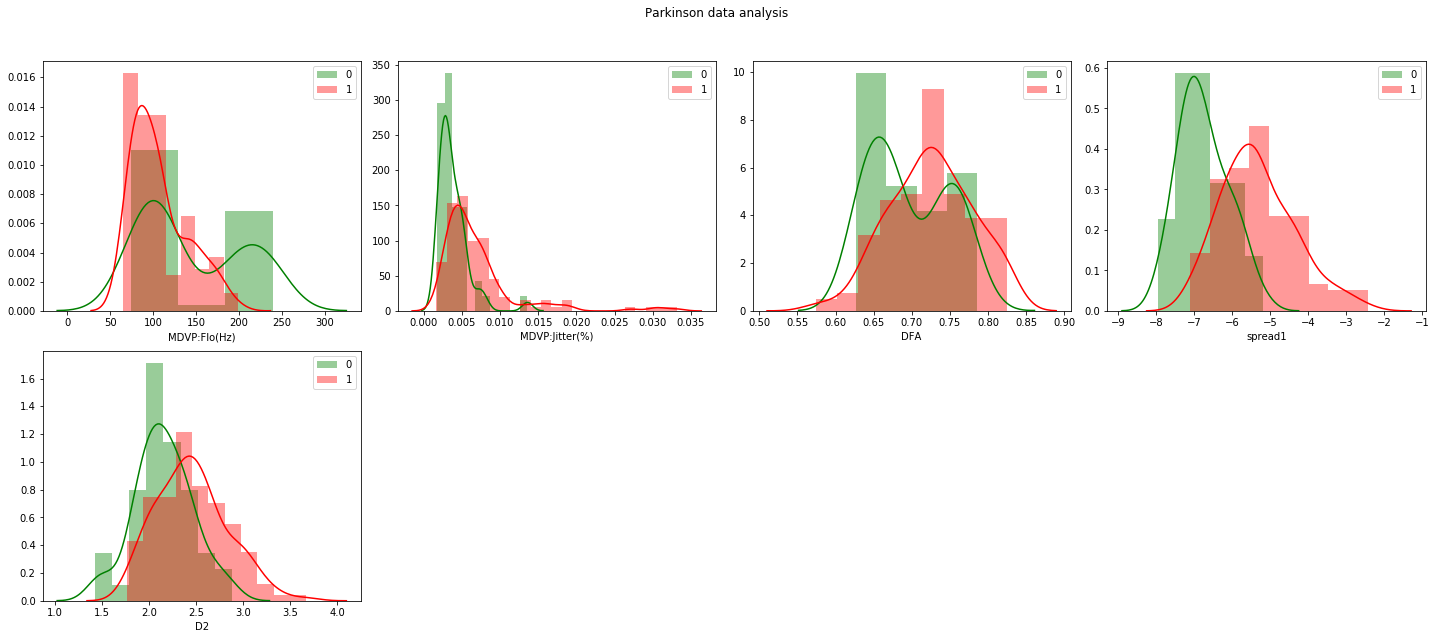

In [0]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['status']==0], color='g', label = '0')
    sns.distplot(data[i][result['status']==1], color='r', label = '1')
    plt.legend(loc='best')
fig.suptitle('Parkinson data analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

##Training time - Logistic Regression

In [0]:
#from google.colab import files

In [0]:
!ls

sample_data


In [0]:
# !rm 'lda (1).py'

In [0]:
#src_logistic_reg = list(files.upload().values())[0]

Saving logisticregression.py to logisticregression.py


In [0]:
#src_kfold = list(files.upload().values())[0]

Saving kfold.py to kfold.py


In [0]:
open('logisticregression.py','wb').write(src_logistic_reg)
import logisticregression as lgor

In [0]:
open('kfold.py','wb').write(src_kfold)
import kfold as my_kf

In [0]:
X = np.float128(data.iloc[:,:].values)
y = parkinson_data["status"].values

X_no_shuffle = np.float128(data.iloc[:,:].values)
y_no_shuffle = parkinson_data["status"].values

In [0]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [0]:
train_indexes, test_indexes = None, None

In [0]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
X_no_shuffle = preprocessing.normalize(X_no_shuffle)

In [0]:
learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
thresholding = 0.5
num_iter = 300000

In [0]:
kf_split = my_kf.KFold(n_splits=10)
cross_val_indexes = list(kf_split.split(y))

In [0]:

print('         Shuffled data')
scores_logistic = []
for lr in learning_rates:
    print(f'Learning rate: {lr}')
    scores = []
    losses = []
    model = lgor.LogisticRegression(learningRate=lr, num_iter=num_iter)
    %timeit
    for index, (train, test) in enumerate(cross_val_indexes):
        print(f'Fold {index + 1}')
        train_x = np.column_stack([np.take(X[:,i], train) for i in range(0, X.shape[1])])
        train_y = np.take(y, train)
        print('Training......')
        %time loss = model.fit(train_x, train_y)

        test_x = np.column_stack([np.take(X[:,i], test) for i in range(0, X.shape[1])])
        test_y = np.take(y, test)

        print('Testing......')
        %time accuracy = model.accu_eval(model.predict(test_x, 0.5), test_y)
        print(f'Accuracy: {accuracy}')
        scores.append(accuracy)
        losses.append(loss)
    scores_logistic.append({
        'learning_rate': lr,
        'scores' : scores,
        'loss' : losses
    })
    print('--------------------------------------------------------------------')

         Shuffled data
Learning rate: 1e-06
Fold 1
Training......
loss : 0.6636280745082611 	
CPU times: user 6.31 s, sys: 27 ms, total: 6.33 s
Wall time: 6.35 s
Testing......
CPU times: user 108 µs, sys: 1 µs, total: 109 µs
Wall time: 112 µs
Accuracy: 89.47368421052632
Fold 2
Training......
loss : 0.6577369052988318 	
CPU times: user 6.13 s, sys: 31 ms, total: 6.17 s
Wall time: 6.17 s
Testing......
CPU times: user 197 µs, sys: 2 µs, total: 199 µs
Wall time: 142 µs
Accuracy: 68.42105263157895
Fold 3
Training......
loss : 0.6650164425017441 	
CPU times: user 6.14 s, sys: 28 ms, total: 6.17 s
Wall time: 6.17 s
Testing......
CPU times: user 0 ns, sys: 96 µs, total: 96 µs
Wall time: 99.2 µs
Accuracy: 94.73684210526315
Fold 4
Training......
loss : 0.663628186212403 	
CPU times: user 6.19 s, sys: 30 ms, total: 6.22 s
Wall time: 6.23 s
Testing......
CPU times: user 91 µs, sys: 1e+03 ns, total: 92 µs
Wall time: 95.8 µs
Accuracy: 89.47368421052632
Fold 5
Training......
loss : 0.6545904993281216

In [0]:
print('         Unshuffled data')
scores_logistic_no_shuffle = []
for lr in learning_rates:
    print(f'Learning rate: {lr}')
    scores = []
    losses = []
    model = lgor.LogisticRegression(learningRate=lr, num_iter=num_iter)
    %timeit
    for index, (train, test) in enumerate(cross_val_indexes):
        print(f'Fold {index + 1}')
        train_x = np.column_stack([np.take(X_no_shuffle[:,i], train) for i in range(0, X_no_shuffle.shape[1])])
        train_y = np.take(y_no_shuffle, train)
        print('Training......')
        %time loss = model.fit(train_x, train_y)

        test_x = np.column_stack([np.take(X_no_shuffle[:,i], test) for i in range(0, X_no_shuffle.shape[1])])
        test_y = np.take(y_no_shuffle, test)

        print('Testing......')
        %time accuracy = model.accu_eval(model.predict(test_x, 0.5), test_y)
        print(f'Accuracy: {accuracy}')
        scores.append(accuracy)
        losses.append(loss)
    scores_logistic_no_shuffle.append({
        'learning_rate': lr,
        'scores' : scores,
        'loss' : losses
    })
    print('--------------------------------------------------------------------')

         Unshuffled data
Learning rate: 1e-06
Fold 1
Training......
loss : 0.6663726428011876 	
CPU times: user 6.22 s, sys: 19 ms, total: 6.24 s
Wall time: 6.24 s
Testing......
CPU times: user 189 µs, sys: 2 µs, total: 191 µs
Wall time: 138 µs
Accuracy: 100.0
Fold 2
Training......
loss : 0.657736456915606 	
CPU times: user 6.18 s, sys: 36 ms, total: 6.21 s
Wall time: 6.22 s
Testing......
CPU times: user 92 µs, sys: 1e+03 ns, total: 93 µs
Wall time: 95.1 µs
Accuracy: 68.42105263157895
Fold 3
Training......
loss : 0.6478954756648464 	
CPU times: user 6.1 s, sys: 29 ms, total: 6.12 s
Wall time: 6.13 s
Testing......
CPU times: user 102 µs, sys: 1 µs, total: 103 µs
Wall time: 107 µs
Accuracy: 36.84210526315789
Fold 4
Training......
loss : 0.6577362124752993 	
CPU times: user 6.15 s, sys: 23.9 ms, total: 6.17 s
Wall time: 6.18 s
Testing......
CPU times: user 194 µs, sys: 2 µs, total: 196 µs
Wall time: 155 µs
Accuracy: 68.42105263157895
Fold 5
Training......
loss : 0.6663724350029177 	
CPU t

In [0]:
import statistics 

In [0]:
max_accuracy = [max(score["scores"]) for score in scores_logistic]
average_accuracy = [statistics.mean(score["scores"]) for score in scores_logistic]
min_accuracy = [min(score["scores"]) for score in scores_logistic]

max_accuracy_no_shuffle = [max(score["scores"]) for score in scores_logistic_no_shuffle]
average_accuracy_no_shuffle = [statistics.mean(score["scores"]) for score in scores_logistic_no_shuffle]
min_accuracy_no_shuffle = [min(score["scores"]) for score in scores_logistic_no_shuffle]

max_loss = [max(score["loss"]) for score in scores_logistic]
average_loss = [statistics.mean(score["loss"]) for score in scores_logistic]
min_loss = [min(score["loss"]) for score in scores_logistic]

max_loss_no_shuffle = [max(score["loss"]) for score in scores_logistic_no_shuffle]
average_loss_no_shuffle = [statistics.mean(score["loss"]) for score in scores_logistic_no_shuffle]
min_loss_no_shuffle = [min(score["loss"]) for score in scores_logistic_no_shuffle]

In [0]:
print(f'Learning rates {learning_rates}')
print(f'Maximum loss: {max_loss}')
print(f'Minimum loss: {min_loss}')
print(f'Average loss: {average_loss}')

print(f'Maximum loss (no shuffle): {max_loss_no_shuffle}')
print(f'Minimum loss (no shuffle): {min_loss_no_shuffle}')
print(f'Average loss (no shuffle): {average_loss_no_shuffle}')

print(f'Maximum accuracy: {max_accuracy}')
print(f'Minimum accuracy: {min_accuracy}')
print(f'Average accuracy: {average_accuracy}')

print(f'Maximum accuracy (no shuffle): {max_accuracy_no_shuffle}')
print(f'Minimum accuracy (no shuffle): {min_accuracy_no_shuffle}')
print(f'Average accuracy (no shuffle): {average_accuracy_no_shuffle}')

Learning rates [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
Maximum loss: [0.6650164425017441, 0.5879006162059542, 0.5802350707890569, 0.5797035681388141, 0.5745541944503253, 0.5344157371519294]
Minimum loss: [0.6545901122381348, 0.5478115940969239, 0.5358912193238043, 0.5353194720085974, 0.5299271544020865, 0.4927444683980778]
Average loss: [0.6596500162536388, 0.567308433390149, 0.5575214657104671, 0.5569937023491398, 0.5519665898801543, 0.5155216393719161]
Maximum loss (no shuffle): [0.6663726428011876, 0.5930709681264079, 0.5858931206831147, 0.5853782276102475, 0.5803704415928563, 0.5417450443988691]
Minimum loss (no shuffle): [0.6385381989968834, 0.4849289996310165, 0.46425591991864773, 0.4629419361595776, 0.451094137439692, 0.39459891782629386]
Average loss (no shuffle): [0.6591505304601739, 0.5651960122101521, 0.5548631384322998, 0.5542767407744508, 0.5487390820331693, 0.5107037422124944]
Maximum accuracy: [94.73684210526315, 94.73684210526315, 94.73684210526315, 94.73684210526315, 

In [0]:
max_accuracy

[94.73684210526315,
 94.73684210526315,
 94.73684210526315,
 94.73684210526315,
 94.73684210526315,
 94.73684210526315]

In [0]:
max_accuracy_no_shuffle

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

In [0]:
average_accuracy

[75.50438596491227,
 75.50438596491227,
 75.50438596491227,
 75.50438596491227,
 75.50438596491227,
 75.50438596491227]

In [0]:
average_accuracy_no_shuffle

[76.71052631578948,
 76.71052631578948,
 76.71052631578948,
 76.71052631578948,
 76.71052631578948,
 76.71052631578948]

In [0]:
min_accuracy

[57.89473684210527,
 57.89473684210527,
 57.89473684210527,
 57.89473684210527,
 57.89473684210527,
 57.89473684210527]

In [0]:
min_accuracy_no_shuffle

[25.0, 25.0, 25.0, 25.0, 25.0, 25.0]

In [0]:
scores_logistic

[{'learning_rate': 1e-06,
  'loss': [0.6636280745082611,
   0.6577369052988318,
   0.6650164425017441,
   0.663628186212403,
   0.6545904993281216,
   0.6592594562440109,
   0.6592592171895331,
   0.6607490647869315,
   0.6545901122381348,
   0.6580422042284169],
  'scores': [89.47368421052632,
   68.42105263157895,
   94.73684210526315,
   89.47368421052632,
   57.89473684210527,
   73.68421052631578,
   73.68421052631578,
   78.94736842105263,
   57.89473684210527,
   70.83333333333334]},
 {'learning_rate': 1e-05,
  'loss': [0.5825959273438416,
   0.5599739680947037,
   0.5879006162059542,
   0.5825963161529711,
   0.5478151206525174,
   0.5658386776954512,
   0.5658386937351279,
   0.5715643828337292,
   0.5478115940969239,
   0.5611490370902699],
  'scores': [89.47368421052632,
   68.42105263157895,
   94.73684210526315,
   89.47368421052632,
   57.89473684210527,
   73.68421052631578,
   73.68421052631578,
   78.94736842105263,
   57.89473684210527,
   70.83333333333334]},
 {'lear

##Training time - LDA

In [0]:
#src_lda2 = list(files.upload().values())[0]

Saving lda.py to lda.py


In [0]:
open('lda3.py','wb').write(src_lda2)
import lda3 as mylda

In [0]:
model2 = mylda.LDA(np.array(X), np.array(y))
prediction2 = model2.predict(model2.xData)
model2.accu_eval(prediction2, model2.yData)

85.12820512820512

In [0]:
%%time
print('         Shuffled data')
scores_lda = []

for index, (train, test) in enumerate(cross_val_indexes):
    print(f'Fold {index + 1}')
    train_x = np.column_stack([np.take(X[:,i], train) for i in range(0, X.shape[1])])
    train_y = np.take(y, train)
    
    print('Training......')
    %time lda_model = mylda.LDA(np.array(train_x), np.array(train_y))

    test_x = np.column_stack([np.take(X[:,i], test) for i in range(0, X.shape[1])])
    test_y = np.take(y, test)
    print('Training......')
    %time accuracy = lda_model.accu_eval(lda_model.predict(test_x), test_y)

    print(f'Accuracy: {accuracy}')
    scores_lda.append(accuracy)
    print('--------------------------------------------------------------------')

         Shuffled data
Fold 1
Training......
CPU times: user 3.11 ms, sys: 0 ns, total: 3.11 ms
Wall time: 3.12 ms
Training......
CPU times: user 1.09 ms, sys: 997 µs, total: 2.08 ms
Wall time: 1.51 ms
Accuracy: 100.0
--------------------------------------------------------------------
Fold 2
Training......
CPU times: user 3.18 ms, sys: 3.99 ms, total: 7.17 ms
Wall time: 3.72 ms
Training......
CPU times: user 396 µs, sys: 1.98 ms, total: 2.38 ms
Wall time: 1.24 ms
Accuracy: 89.47368421052632
--------------------------------------------------------------------
Fold 3
Training......
CPU times: user 2.76 ms, sys: 3.99 ms, total: 6.75 ms
Wall time: 3.52 ms
Training......
CPU times: user 384 µs, sys: 1.99 ms, total: 2.37 ms
Wall time: 1.23 ms
Accuracy: 94.73684210526315
--------------------------------------------------------------------
Fold 4
Training......
CPU times: user 4.34 ms, sys: 3 ms, total: 7.34 ms
Wall time: 4.04 ms
Training......
CPU times: user 1.34 ms, sys: 1 ms, total: 2.34 

In [0]:
%%time
print('         Unshuffled data')
scores_lda_no_shuffle = []

for index, (train, test) in enumerate(cross_val_indexes):
    print(f'Fold {index + 1}')
    train_x = np.column_stack([np.take(X_no_shuffle[:,i], train) for i in range(0, X_no_shuffle.shape[1])])
    train_y = np.take(y_no_shuffle, train)
    
    print('Training......')
    %time lda_model = mylda.LDA(np.array(train_x), np.array(train_y))

    test_x = np.column_stack([np.take(X_no_shuffle[:,i], test) for i in range(0, X_no_shuffle.shape[1])])
    test_y = np.take(y_no_shuffle, test)
    print('Training......')
    %time accuracy = lda_model.accu_eval(lda_model.predict(test_x), test_y)

    print(f'Accuracy: {accuracy}')
    scores_lda_no_shuffle.append(accuracy)
    print('--------------------------------------------------------------------')

         Unshuffled data
Fold 1
Training......
CPU times: user 3.89 ms, sys: 0 ns, total: 3.89 ms
Wall time: 4.17 ms
Training......
CPU times: user 1.42 ms, sys: 1 ms, total: 2.43 ms
Wall time: 1.27 ms
Accuracy: 94.73684210526315
--------------------------------------------------------------------
Fold 2
Training......
CPU times: user 2.42 ms, sys: 3.99 ms, total: 6.4 ms
Wall time: 3.9 ms
Training......
CPU times: user 1.32 ms, sys: 1.99 ms, total: 3.31 ms
Wall time: 1.7 ms
Accuracy: 89.47368421052632
--------------------------------------------------------------------
Fold 3
Training......
CPU times: user 4.33 ms, sys: 4.99 ms, total: 9.32 ms
Wall time: 4.85 ms
Training......
CPU times: user 2.42 ms, sys: 994 µs, total: 3.41 ms
Wall time: 1.75 ms
Accuracy: 68.42105263157895
--------------------------------------------------------------------
Fold 4
Training......
CPU times: user 4.91 ms, sys: 3.82 ms, total: 8.73 ms
Wall time: 5.06 ms
Training......
CPU times: user 1.81 ms, sys: 1.01 

In [0]:
max_accuracy_lda = max(scores_lda)
min_accuracy_lda = min(scores_lda)
average_accuracy_lda = statistics.mean(scores_lda)

max_accuracy_lda_no_shuffle = max(scores_lda_no_shuffle)
min_accuracy_lda_no_shuffle = min(scores_lda_no_shuffle)
average_accuracy_lda_no_shuffle = statistics.mean(scores_lda_no_shuffle)

In [0]:
print(f'Maximum accuracy: {max_accuracy_lda}')
print(f'Minimum accuracy: {min_accuracy_lda}')
print(f'Average accuracy: {average_accuracy_lda}')

print(f'Maximum accuracy (no shuffle): {max_accuracy_lda_no_shuffle}')
print(f'Minimum accuracy (no shuffle): {min_accuracy_lda_no_shuffle}')
print(f'Average accuracy (no shuffle): {average_accuracy_lda_no_shuffle}')

Maximum accuracy: 100.0
Minimum accuracy: 63.1578947368421
Average accuracy: 84.86842105263158
Maximum accuracy (no shuffle): 100.0
Minimum accuracy (no shuffle): 25.0
Average accuracy (no shuffle): 81.44736842105263


In [0]:
max_accuracy_lda

100.0

In [0]:
max_accuracy_lda_no_shuffle

100.0

In [0]:
min_accuracy_lda

63.1578947368421

In [0]:
min_accuracy_lda_no_shuffle

25.0

In [0]:
average_accuracy_lda

84.86842105263158

In [0]:
average_accuracy_lda_no_shuffle

81.44736842105263

In [0]:
scores_lda

[100.0,
 89.47368421052632,
 94.73684210526315,
 100.0,
 78.94736842105263,
 73.68421052631578,
 89.47368421052632,
 84.21052631578947,
 63.1578947368421,
 75.0]

In [0]:
scores_lda_no_shuffle

[94.73684210526315,
 89.47368421052632,
 68.42105263157895,
 100.0,
 100.0,
 52.63157894736842,
 94.73684210526315,
 94.73684210526315,
 94.73684210526315,
 25.0]

##Result analysis

Text(0, 0.5, 'Flights')

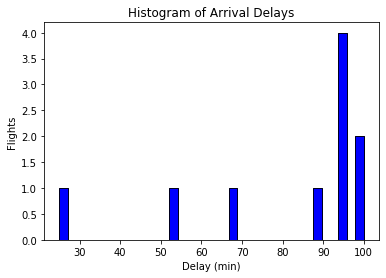

In [0]:
# matplotlib histogram
plt.hist(scores_lda_no_shuffle, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(scores_lda_no_shuffle, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')